In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import glob
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
!conda install -y gdown

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    filelock-3.8.2             |     pyhd8ed1ab_0          14 KB  conda-forge
    gdown-4.6.0                |     pyhd8ed1ab_0          18 KB  conda-forge
    openssl-1.1.1s             |       h0b41bf4_1         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages

In [3]:
# # https://drive.google.com/file/d/{FILE_ID}/view?usp=sharing
!gdown --id 1N2bB09sS1EGPYj0ewWGhOX7SdR82K4Y_

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1N2bB09sS1EGPYj0ewWGhOX7SdR82K4Y_
To: /kaggle/working/Copy of NN Dataset.zip
100%|█████████████████████████████████████████| 274M/274M [00:00<00:00, 286MB/s]


In [4]:
!unzip -q "/kaggle/working/Copy of NN Dataset.zip"

In [5]:
print(f"{tf.test.is_gpu_available()}")

True


2022-12-26 02:22:47.366170: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 02:22:47.401702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 02:22:47.501029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 02:22:47.501938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [6]:
train_path = r"/kaggle/working/Train"
test_path =r"/kaggle/working/Test"
# train_path = r"F:\mohamed\4th_year_new\NN\project\NN Dataset\Train"
# test_path =r"F:\mohamed\4th_year_new\NN\project\NN Dataset\Test"

In [7]:
train_imgs=os.listdir(train_path)
test_imgs=os.listdir(test_path)

In [8]:
code = {'Basketball' : 0 , 'Football' : 1 , 'Rowing' : 2 , 'Swimming' :3 ,"Tennis" : 4 , "Yoga" : 5}

def get_name(n):

    for x,y in code.items() :
        if y == n :
            return x

In [9]:
#get labels for training
train_labels = []

for cur_img in train_imgs:
    if "Basketball" in cur_img :
        label = (code["Basketball"])
    elif "Football" in cur_img :
        label = (code["Football"])
    elif "Rowing" in cur_img :
        label = (code["Rowing"])
    elif "Swimming" in cur_img :
        label = (code["Swimming"])
    elif "Tennis" in cur_img :
        label = (code["Tennis"])
    elif "Yoga" in cur_img :
        label = (code["Yoga"])

    train_labels.append(label)

In [10]:
#reading images 
def reading_resize(train_imgs,train_path,image_size):
    l=[]
    for g in train_imgs:   
        img_path=os.path.join(train_path,g)
        img=cv2.imread(img_path)   
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        res = cv2.resize(img, (image_size, image_size))
        l.append(res)
        
    return l

In [11]:
#reading trining data
image_size=224
l_train=reading_resize(train_imgs,train_path,image_size)

In [12]:
train = np.array(l_train)
labels=np.array(train_labels)
print(train.shape)

(1681, 224, 224, 3)


Tennis


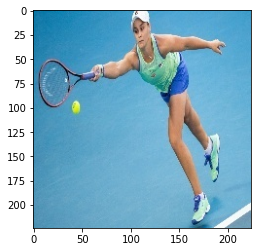

In [13]:
plt.imshow(train[0])
print(get_name(labels[0]))

In [14]:
pd.DataFrame(labels).value_counts()

5    458
1    400
3    240
2    202
0    196
4    185
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train , labels, test_size = 0.2,stratify=labels,shuffle=True)

In [16]:
X_train.shape

(1344, 224, 224, 3)

In [17]:
y_train

array([4, 5, 0, ..., 5, 0, 4])

In [18]:
num_labels = len(np.unique(y_train))
num_labels

6

In [19]:
# Train labels
y_train=tf.keras.utils.to_categorical(y_train)

# Test labels
y_val=tf.keras.utils.to_categorical(y_val)

In [20]:
image_size=X_train.shape[1]

In [21]:
y_train.shape

(1344, 6)

In [22]:
X_train,X_val=X_train/255.0,X_val/255.0

In [23]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

In [24]:
input_shape = (image_size, image_size, 3)
batch_size = 32

In [25]:
inputs=Input(shape=input_shape)

# Block 1
y = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
y = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(y)
y = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(y)

# Block 2
y = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(y)
y = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(y)
y = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(y)

# Block 3
y = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(y)
y = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(y)
y = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(y)
y = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(y)
y = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(y)

# Block 4
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(y)
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(y)
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(y)
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(y)
y = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(y)

# Block 5
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(y)
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(y)
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(y)
y = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(y)
y = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(y)
y = Flatten(name='flatten')(y)

# Create model.
model = Model(inputs=inputs, outputs=y)

2022-12-26 02:23:22.147256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 02:23:22.148138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 02:23:22.148834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 02:23:22.149728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 02:23:22.150410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [26]:
#WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [27]:
from keras.utils.data_utils import get_file
weights_path = get_file('vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
model.load_weights(weights_path)

80150528/80134624 [==============================] - 3s 0us/step


In [28]:
model.trainable=False

In [30]:
model2 = tf.keras.Sequential([
        model,
#         tf.keras.layers.Dense(4096, activation = 'relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(4096, activation = 'relu'),
#         tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_labels, activation = 'softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 25088)             20024384  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150534    
Total params: 20,174,918
Trainable params: 150,534
Non-trainable params: 20,024,384
_________________________________________________________________


In [31]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
batch_size=32
#filepath="weights.best.hdf5"
#check_point = tf.keras.callbacks.ModelCheckpoint(filepath,save_best_only=True, save_weights_only=True,monitor='val_accuracy', verbose=1, mode='max')
# #early_stop = tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

Epochs=20
history = model2.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                    batch_size=batch_size,
                    verbose=1)#callbacks=[check_point]

2022-12-26 03:19:52.393835: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 809238528 exceeds 10% of free system memory.


Epoch 1/20
42/42 [==============================] - 5s 109ms/step - loss: 2.1129e-05 - accuracy: 1.0000 - val_loss: 0.4042 - val_accuracy: 0.9169
Epoch 2/20
42/42 [==============================] - 4s 95ms/step - loss: 2.0736e-05 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9169
Epoch 3/20
42/42 [==============================] - 4s 95ms/step - loss: 2.0415e-05 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9169
Epoch 4/20
42/42 [==============================] - 4s 96ms/step - loss: 1.9991e-05 - accuracy: 1.0000 - val_loss: 0.4040 - val_accuracy: 0.9169
Epoch 5/20
42/42 [==============================] - 4s 96ms/step - loss: 1.9659e-05 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9169
Epoch 6/20
42/42 [==============================] - 4s 95ms/step - loss: 1.9364e-05 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.9169
Epoch 7/20
42/42 [==============================] - 4s 95ms/step - loss: 1.9025e-05 - accuracy: 1.0000 - val_loss: 0.4040 - val_a

In [46]:
#model2.load_weights('/kaggle/working/weights.best.hdf5') # in case of turning on checking point calls

In [47]:
score=model2.evaluate(X_val,y_val,batch_size=batch_size,verbose=0)
print("Test accuracy: %.1f%%" % (100.0 * score[1]))

Test accuracy: 92.0%


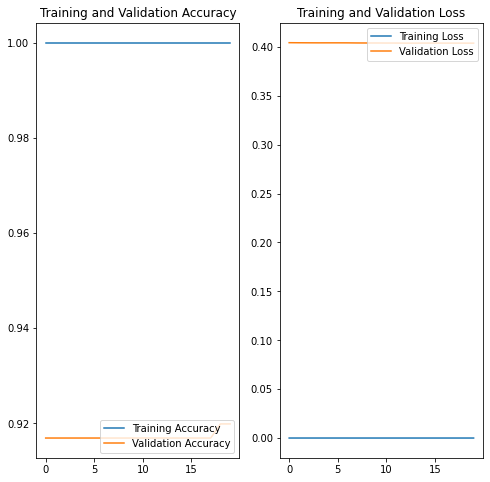

In [48]:
#doctor 
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Try Data Augmentation

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_generator = ImageDataGenerator(    
    rotation_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [39]:
# tf.random.set_seed(42)

Batch_size=32


history = model2.fit(train_generator.flow(X_train,y_train
                                         ,batch_size=Batch_size),
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                    verbose=1)#,callbacks=[early_stop,check_point]

Epoch 1/20
42/42 [==============================] - 15s 367ms/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 0.3895 - val_accuracy: 0.9139
Epoch 2/20
42/42 [==============================] - 15s 362ms/step - loss: 0.0554 - accuracy: 0.9814 - val_loss: 0.5502 - val_accuracy: 0.8961
Epoch 3/20
42/42 [==============================] - 15s 350ms/step - loss: 0.0284 - accuracy: 0.9918 - val_loss: 0.4186 - val_accuracy: 0.9080
Epoch 4/20
42/42 [==============================] - 15s 347ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.4892 - val_accuracy: 0.9080
Epoch 5/20
42/42 [==============================] - 15s 354ms/step - loss: 0.0746 - accuracy: 0.9799 - val_loss: 0.4992 - val_accuracy: 0.8991
Epoch 6/20
42/42 [==============================] - 15s 355ms/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 0.4154 - val_accuracy: 0.9169
Epoch 7/20
42/42 [==============================] - 15s 354ms/step - loss: 0.0448 - accuracy: 0.9821 - val_loss: 0.4653 - val_accuracy: 0.9080

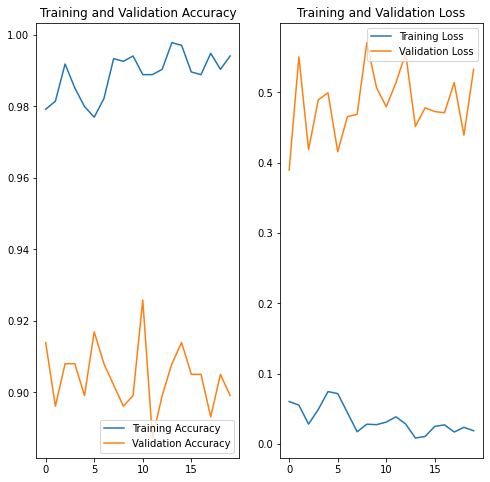

In [40]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model2.evaluate(X_val,y_val)

11/11 [==============================] - 1s 74ms/step - loss: 0.5326 - accuracy: 0.8991


[0.5326380729675293, 0.8991097807884216]

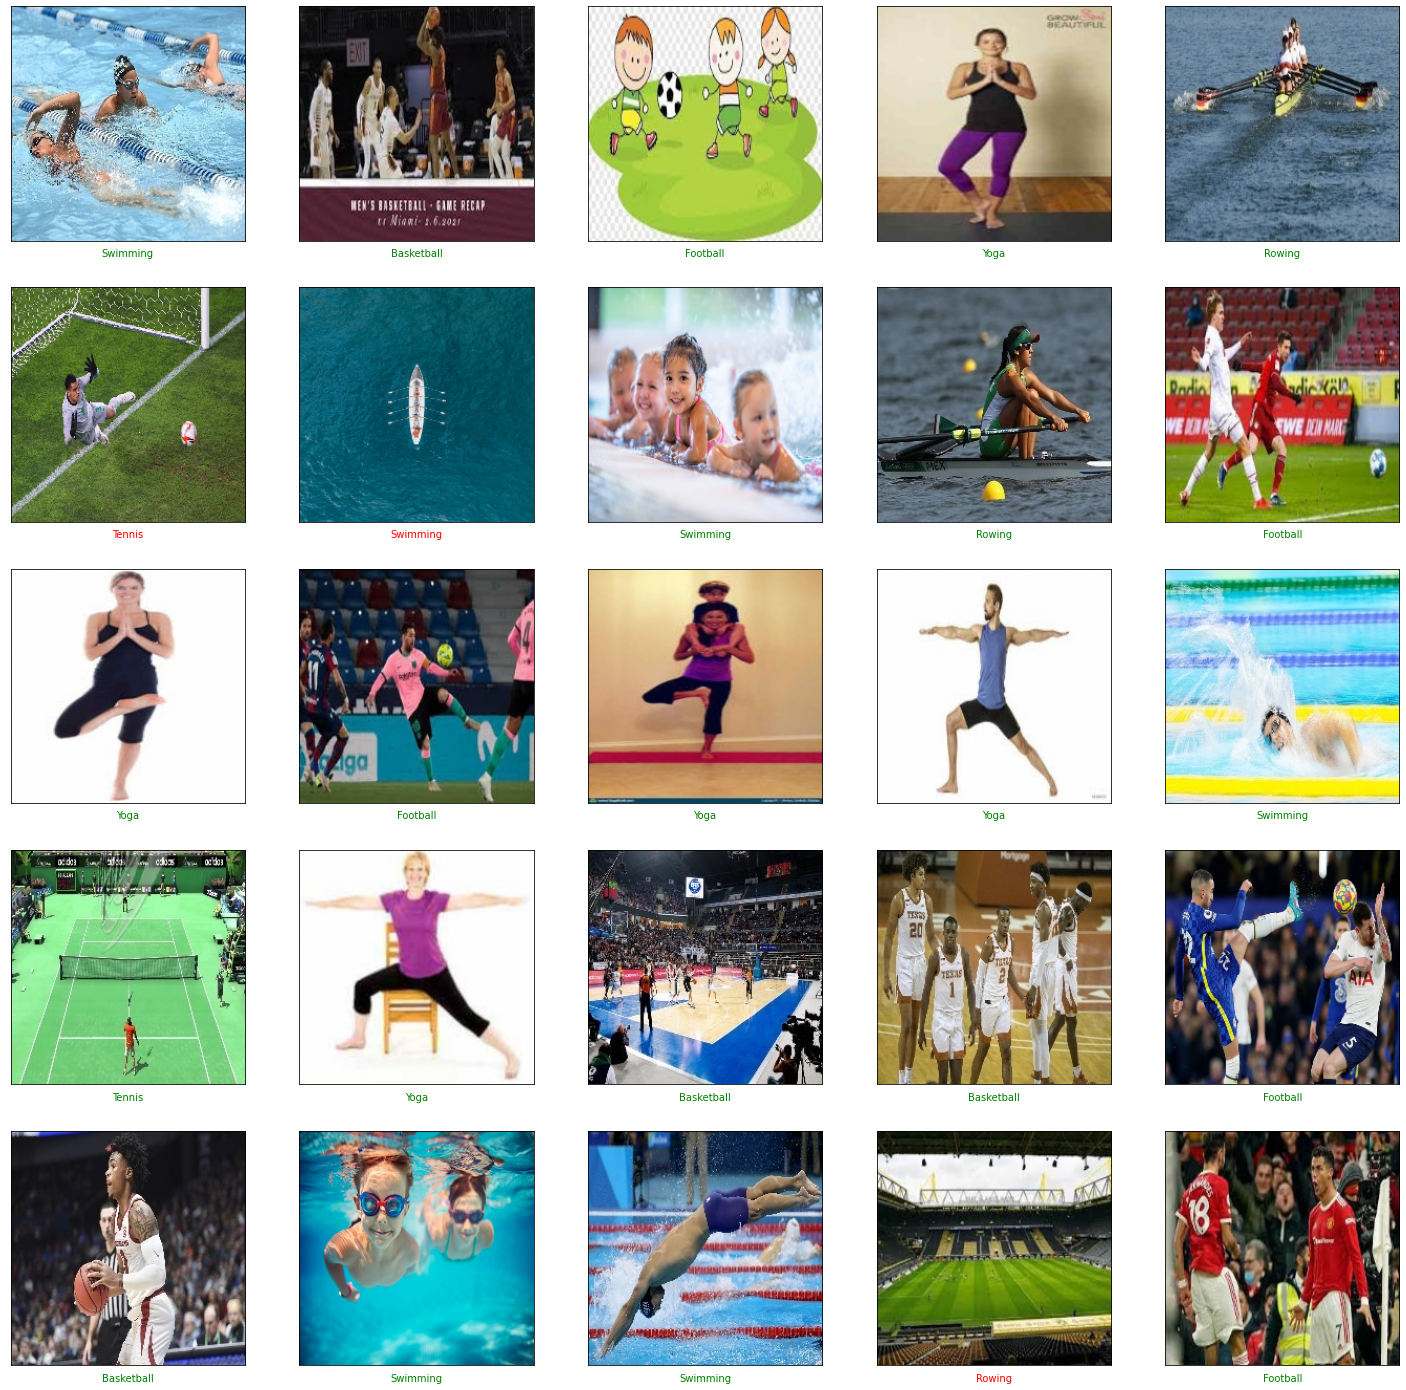

In [42]:
#pred
p=model2.predict(X_val)

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[50+i])
    color = 'green' if get_name(np.argmax(p[50+i])) == get_name(np.argmax(y_val[50+i])) else 'red'
    plt.xlabel(get_name(np.argmax(p[50+i])),color=color)
plt.show()

## saving the model

In [49]:
saved_keras_model_filepath = './{}.h5'.format("vgg19 model")
model2.save(saved_keras_model_filepath)

# Load the model

In [50]:
reloaded_keras_model=tf.keras.models.load_model('vgg19 model.h5')

reloaded_keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 25088)             20024384  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150534    
Total params: 20,174,918
Trainable params: 150,534
Non-trainable params: 20,024,384
_________________________________________________________________


# Predict our test data

In [51]:
#reading test data
l_test=reading_resize(test_imgs,test_path,image_size)

In [52]:
test = np.array(l_test)
print(test.shape)

(688, 224, 224, 3)


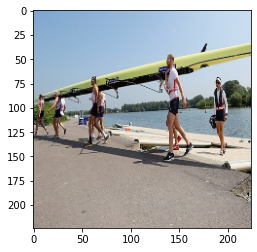

In [53]:
plt.imshow(test[200])

In [54]:
test_names=[]
for g in test_imgs:   
    test_names.append(g)

In [55]:
len(test_names)

688

In [56]:
#normalize
test=test/255.0

In [57]:
test_out=model2.predict(test)

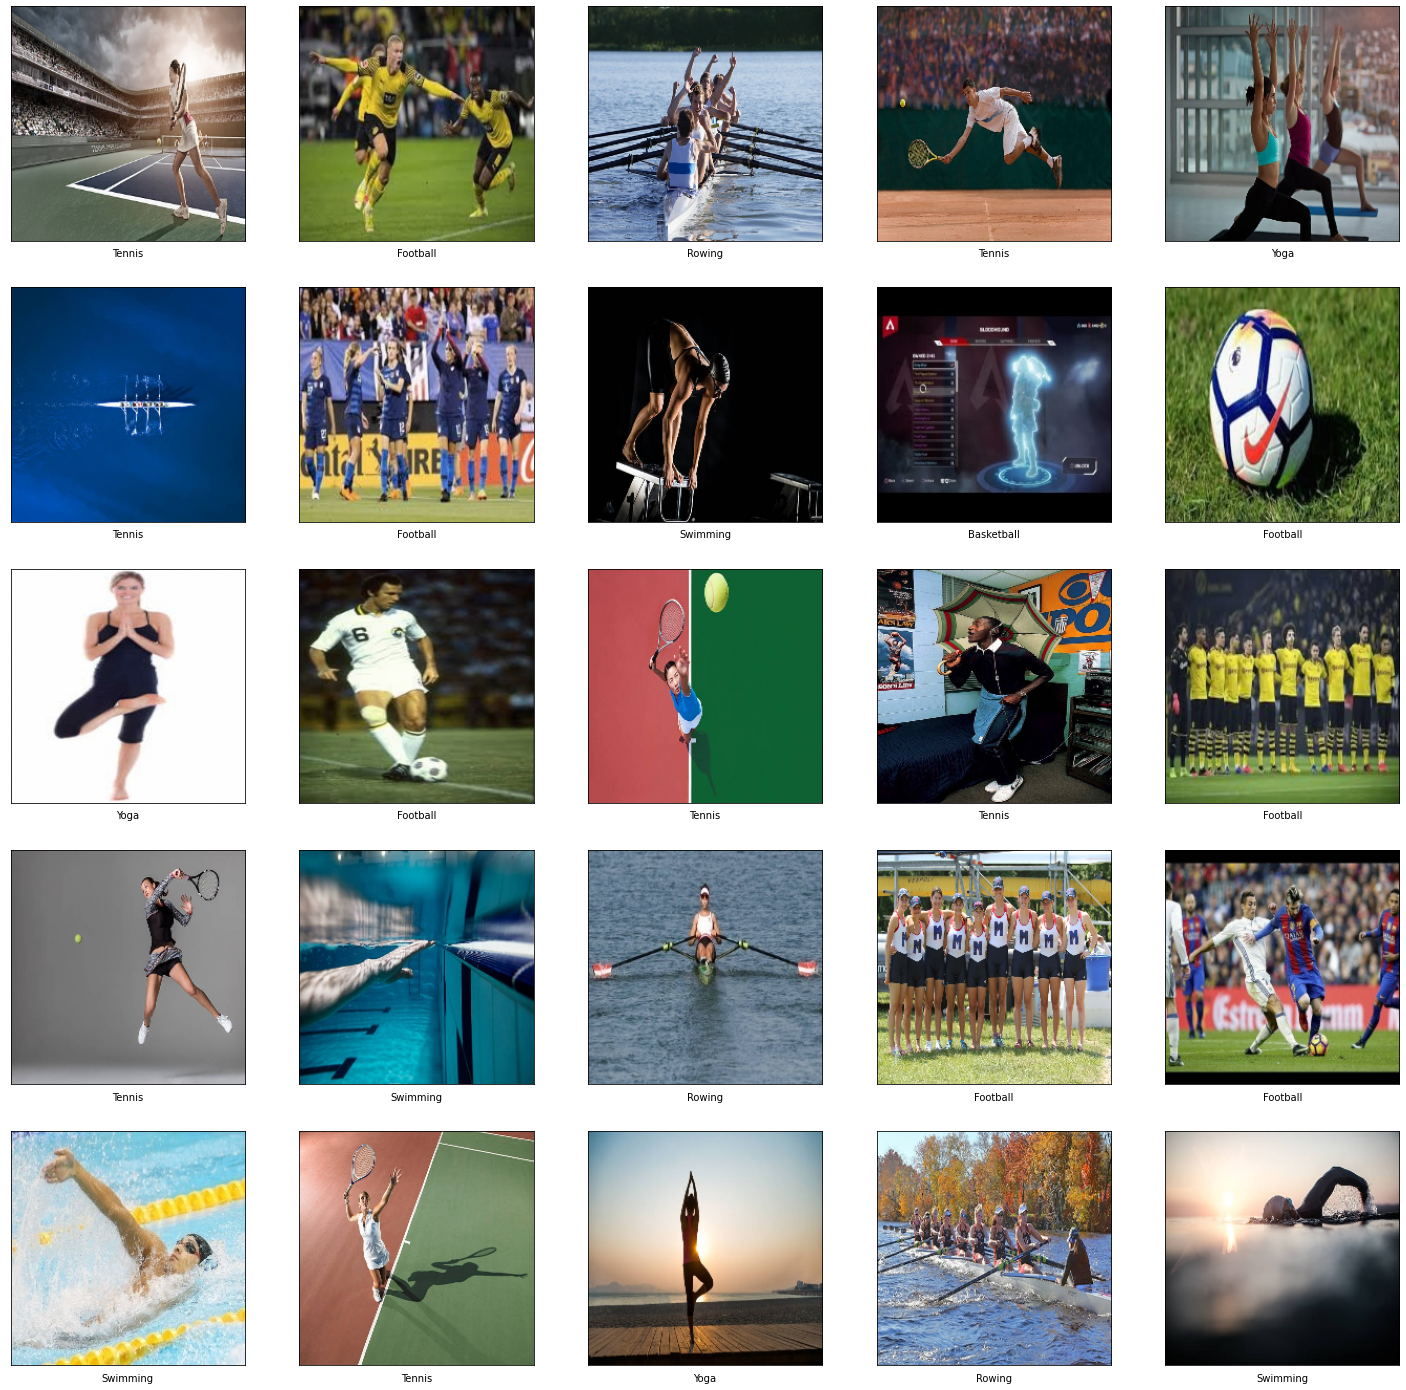

In [58]:
#pred
p=test_out

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[i])
    plt.xlabel(get_name(np.argmax(p[i])))
plt.show()

In [63]:
pred_out=[]
for i in range(len(test_out)):
    label=np.argmax(test_out[i])
    pred_out.append([test_names[i],label])

In [64]:
pred_out

[['418.jpg', 3],
 ['244.jpg', 0],
 ['544.jpg', 5],
 ['57.jpg', 5],
 ['81.jpg', 1],
 ['620.jpg', 5],
 ['187.jpg', 3],
 ['104.jpg', 5],
 ['465.jpg', 4],
 ['437.jpg', 4],
 ['678.jpg', 1],
 ['449.jpg', 1],
 ['56.jpg', 5],
 ['175.jpg', 2],
 ['253.jpg', 5],
 ['564.jpg', 2],
 ['531.jpg', 2],
 ['347.jpg', 2],
 ['173.jpg', 2],
 ['76.jpg', 4],
 ['459.jpg', 4],
 ['222.jpg', 5],
 ['601.jpg', 5],
 ['114.jpg', 2],
 ['463.jpg', 0],
 ['599.jpg', 4],
 ['447.jpg', 1],
 ['109.jpg', 4],
 ['456.jpg', 0],
 ['442.jpg', 3],
 ['451.jpg', 1],
 ['275.jpg', 4],
 ['82.jpg', 0],
 ['338.jpg', 3],
 ['485.jpg', 2],
 ['168.jpg', 1],
 ['238.jpg', 3],
 ['500.jpg', 2],
 ['457.jpg', 1],
 ['59.jpg', 0],
 ['467.jpg', 1],
 ['257.jpg', 4],
 ['180.jpg', 1],
 ['68.jpg', 0],
 ['35.jpg', 0],
 ['125.jpg', 3],
 ['352.jpg', 3],
 ['148.jpg', 3],
 ['556.jpg', 4],
 ['225.jpg', 3],
 ['70.jpg', 5],
 ['464.jpg', 1],
 ['248.jpg', 1],
 ['658.jpg', 1],
 ['6.jpg', 3],
 ['174.jpg', 5],
 ['83.jpg', 3],
 ['42.jpg', 2],
 ['333.jpg', 1],
 ['623.jpg

In [65]:
Datapd=pd.DataFrame(pred_out,columns=['image_name','label'])
Datapd.head()

image_name  label
0    418.jpg      3
1    244.jpg      0
2    544.jpg      5
3     57.jpg      5
4     81.jpg      1

In [66]:
Datapd.to_csv('sports_6_classs_predvgg2.csv',index=False)

In [111]:
#Aleternative model

# model=tf.keras.models.Sequential([
    
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 3)),
#     tf.keras.layers.BatchNormalization(axis=-1),
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
#     tf.keras.layers.BatchNormalization(axis=-1),
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
#     tf.keras.layers.BatchNormalization(axis=-1),
#     tf.keras.layers.MaxPool2D((2,2)),
    
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(32, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Dense(6,activation=tf.nn.softmax)

# ])

# optim = tf.keras.optimizers.SGD(lr=0.001,momentum=0.5)
# model.compile(loss='categorical_crossentropy',
#               optimizer=optim,
#               metrics=['accuracy'])